# Analisis exploratorio de los datos preprocesados

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
df=pd.read_csv('data/interim/data_limpios.csv')
df.head()

,date,CO,NO,NO2,NOX,O3,PM10,PM2.5,PRS,RAINF,RH,SO2,SR,TOUT,WSR,WDR,Zona
0,2020-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,52.0,49.71,NaN,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NORTE
1,2020-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,53.0,46.70,715.1,0.0,88.0,NaN,0.002,11.14,1.3,3.0,NORTE
2,2020-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,59.0,44.42,714.1,0.0,88.0,NaN,0.002,11.35,1.3,119.0,NORTE
3,2020-01-01 03:00:00,NaN,NaN,NaN,NaN,NaN,60.0,46.84,713.8,0.0,88.0,NaN,0.002,11.52,1.3,110.0,NORTE
4,2020-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,59.0,33.15,713.3,0.0,88.0,NaN,0.002,11.52,NaN,110.0,NORTE


In [32]:
df['date'] = pd.to_datetime(df['date'])
df = df[df['date'].dt.year != 2020]


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118168 entries, 8777 to 144500
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    118168 non-null  datetime64[ns]
 1   CO      108511 non-null  float64       
 2   NO      105704 non-null  float64       
 3   NO2     108805 non-null  float64       
 4   NOX     108906 non-null  float64       
 5   O3      111322 non-null  float64       
 6   PM10    113960 non-null  float64       
 7   PM2.5   95754 non-null   float64       
 8   PRS     113151 non-null  float64       
 9   RAINF   113894 non-null  float64       
 10  RH      101389 non-null  float64       
 11  SO2     108966 non-null  float64       
 12  SR      116216 non-null  float64       
 13  TOUT    107269 non-null  float64       
 14  WSR     113792 non-null  float64       
 15  WDR     111238 non-null  float64       
 16  Zona    118168 non-null  object        
dtypes: datetime64[ns](1), float64(1

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

print("DataFrame con índice de fecha listo.")
print(df.info()) 


DataFrame con índice de fecha listo.
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 118168 entries, 2021-01-01 00:00:00 to 2025-06-30 23:00:00
Data columns (total 16 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   CO      108511 non-null  float64
 1   NO      105704 non-null  float64
 2   NO2     108805 non-null  float64
 3   NOX     108906 non-null  float64
 4   O3      111322 non-null  float64
 5   PM10    113960 non-null  float64
 6   PM2.5   95754 non-null   float64
 7   PRS     113151 non-null  float64
 8   RAINF   113894 non-null  float64
 9   RH      101389 non-null  float64
 10  SO2     108966 non-null  float64
 11  SR      116216 non-null  float64
 12  TOUT    107269 non-null  float64
 13  WSR     113792 non-null  float64
 14  WDR     111238 non-null  float64
 15  Zona    118168 non-null  object 
dtypes: float64(15), object(1)
memory usage: 15.3+ MB
None


In [35]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
stats_summary = df[numeric_cols].describe()


print("\n--- Resumen Estadístico de Variables Numéricas ---")
print(stats_summary.T)


--- Resumen Estadístico de Variables Numéricas ---
          count        mean         std      min     25%      50%      75%  \
CO     108511.0    1.426845    0.879087     0.00    0.77    1.260    1.910   
NO     105704.0   10.308171   17.989580     0.50    2.70    3.800    8.900   
NO2    108805.0   14.537143   10.697869     0.00    6.60   11.400   19.500   
NOX    108906.0   24.472894   25.024213     0.80    9.70   15.600   29.300   
O3     111322.0   27.869972   19.466217     1.00   13.00   24.000   39.000   
PM10   113960.0   57.695791   37.236098     2.00   35.00   50.000   71.000   
PM2.5   95754.0   20.374796   13.591624     0.00   10.90   17.000   26.400   
PRS    113151.0  716.360587    6.237277   669.00  711.50  715.600  721.100   
RAINF  113894.0    0.047277    0.929801     0.00    0.00    0.000    0.000   
RH     101389.0   53.864383  102.176945 -9999.00   39.00   57.000   73.000   
SO2    108966.0    4.306243    2.712624     0.50    2.70    3.600    5.200   
SR     11621

In [36]:
import numpy as np

# Reemplazar valores centinela (-9999) en todo el DataFrame
df.replace(-9999, np.nan, inplace=True)

# Corregir valores físicamente imposibles usando .loc para eficiencia

# RH: Humedad Relativa. Rango físico es [0, 100].
df.loc[df['RH'] > 100, 'RH'] = np.nan
df.loc[df['RH'] < 0, 'RH'] = np.nan

# TOUT: Temperatura. (min -67.49 es imposible).
# Usemos un rango meteorológico razonable para la zona (ej. -10°C a 55°C)
df.loc[df['TOUT'] < -10, 'TOUT'] = np.nan
df.loc[df['TOUT'] > 55, 'TOUT'] = np.nan

# WSR: Velocidad Viento. (max 134.8 es un spike).
# Los rangos del PDF sugieren 0-75 km/h
df.loc[df['WSR'] > 100, 'WSR'] = np.nan
df.loc[df['WSR'] < 0, 'WSR'] = np.nan

# la radiación Solar no puede ser negativa.
df.loc[df['SR'] < 0, 'SR'] = np.nan


In [37]:
# Próximo paso: Verificar la limpieza

# Asumiendo 'numeric_cols' definido en el paso anterior
new_stats_summary = df[numeric_cols].describe()
print(new_stats_summary.T)

          count        mean        std     min     25%      50%      75%  \
CO     108511.0    1.426845   0.879087    0.00    0.77    1.260    1.910   
NO     105704.0   10.308171  17.989580    0.50    2.70    3.800    8.900   
NO2    108805.0   14.537143  10.697869    0.00    6.60   11.400   19.500   
NOX    108906.0   24.472894  25.024213    0.80    9.70   15.600   29.300   
O3     111322.0   27.869972  19.466217    1.00   13.00   24.000   39.000   
PM10   113960.0   57.695791  37.236098    2.00   35.00   50.000   71.000   
PM2.5   95754.0   20.374796  13.591624    0.00   10.90   17.000   26.400   
PRS    113151.0  716.360587   6.237277  669.00  711.50  715.600  721.100   
RAINF  113894.0    0.047277   0.929801    0.00    0.00    0.000    0.000   
RH     101375.0   54.853089  21.710041    0.00   39.00   57.000   73.000   
SO2    108966.0    4.306243   2.712624    0.50    2.70    3.600    5.200   
SR     116197.0    0.131461   0.240639    0.00    0.00    0.001    0.173   
TOUT   10726

In [38]:
print("Calculo de el recuento de valores NaN por columna")

total_rows = df.shape[0]
nan_counts = df.isnull().sum()

nan_percentages = (nan_counts / total_rows) * 100

nan_summary = pd.DataFrame({
    'Conteo_NaN': nan_counts,
    'Porcentaje_NaN': nan_percentages
})

nan_summary_sorted = nan_summary.sort_values(by='Porcentaje_NaN', ascending=False)

print(f"Total de registros (filas): {total_rows}")
print("\n--- Resumen de Valores Nulos (NaN) por Variable ---")
print(nan_summary_sorted)

Calculo de el recuento de valores NaN por columna
Total de registros (filas): 118168

--- Resumen de Valores Nulos (NaN) por Variable ---
       Conteo_NaN  Porcentaje_NaN
PM2.5       22414       18.967910
RH          16793       14.211123
NO          12464       10.547695
TOUT        10899        9.223309
CO           9657        8.172263
NO2          9363        7.923465
NOX          9262        7.837993
SO2          9202        7.787218
WDR          6932        5.866224
O3           6846        5.793447
PRS          5017        4.245650
WSR          4376        3.703202
RAINF        4274        3.616884
PM10         4208        3.561032
SR           1971        1.667964
Zona            0        0.000000


In [39]:

print("Iniciando imputación NaN por grupo (Zona)...")

df[numeric_cols] = df.groupby('Zona')[numeric_cols].transform(
    lambda x: x.interpolate(method='time')
)

print("Interpolación por grupo completada.")

print("Iniciando relleno secundario (bfill) para NaNs iniciales...")
df[numeric_cols] = df.groupby('Zona')[numeric_cols].transform(
    lambda x: x.bfill()
)

print("Relleno secundario completado.")

print("\n--- Verificación final de NaNs ---")
nan_final_check = df.isnull().sum()
print(nan_final_check)

Iniciando imputación NaN por grupo (Zona)...
Interpolación por grupo completada.
Iniciando relleno secundario (bfill) para NaNs iniciales...
Relleno secundario completado.

--- Verificación final de NaNs ---
CO       0
NO       0
NO2      0
NOX      0
O3       0
PM10     0
PM2.5    0
PRS      0
RAINF    0
RH       0
SO2      0
SR       0
TOUT     0
WSR      0
WDR      0
Zona     0
dtype: int64



--- Generando Box Plots por Zona ---


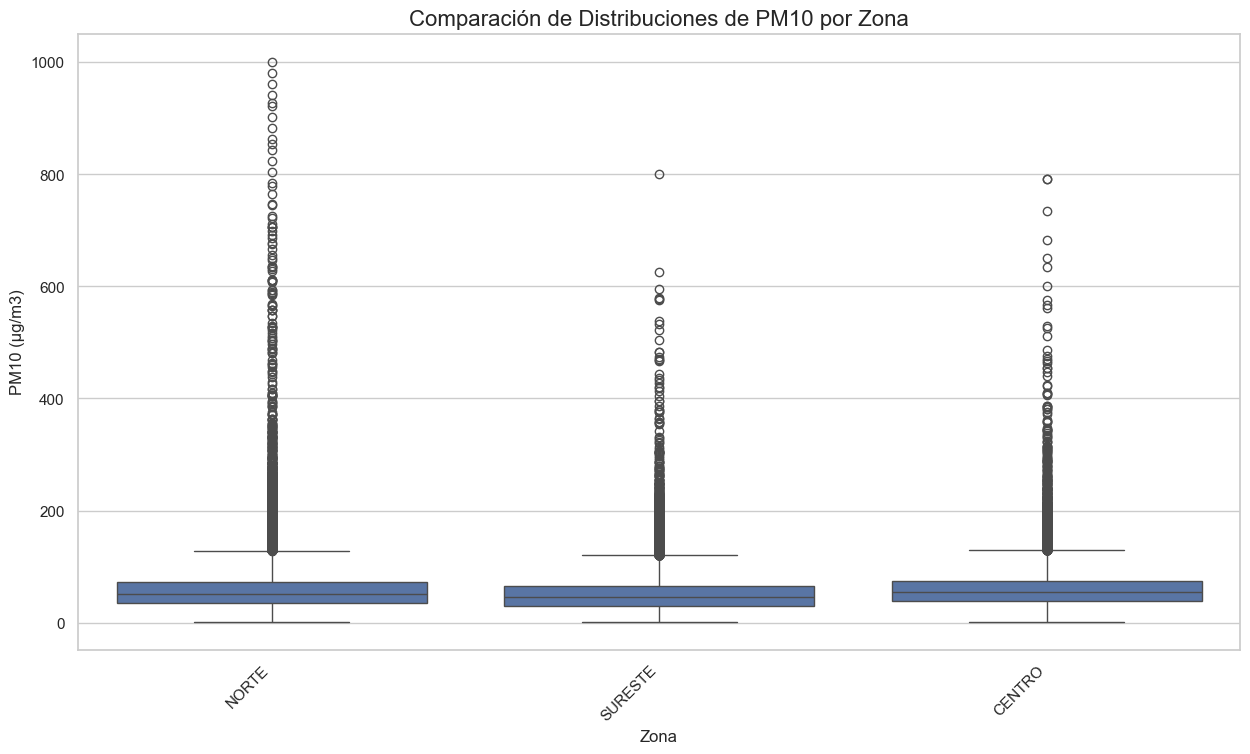

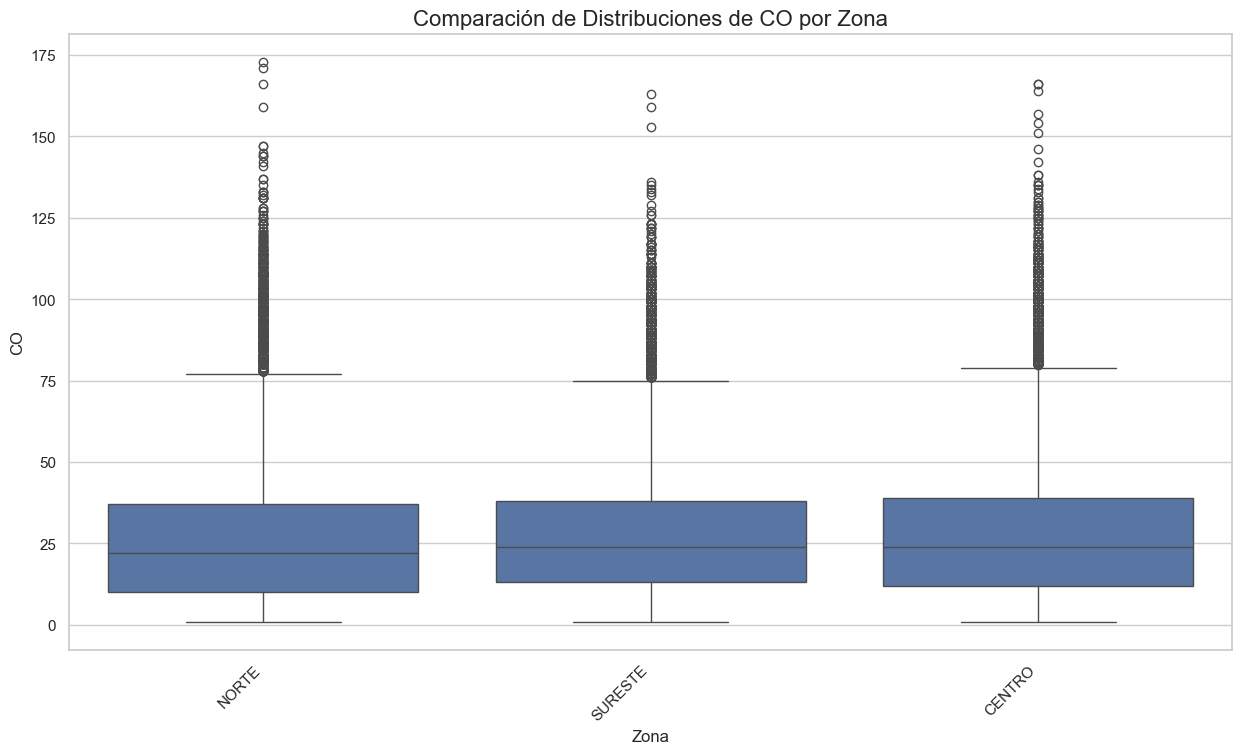

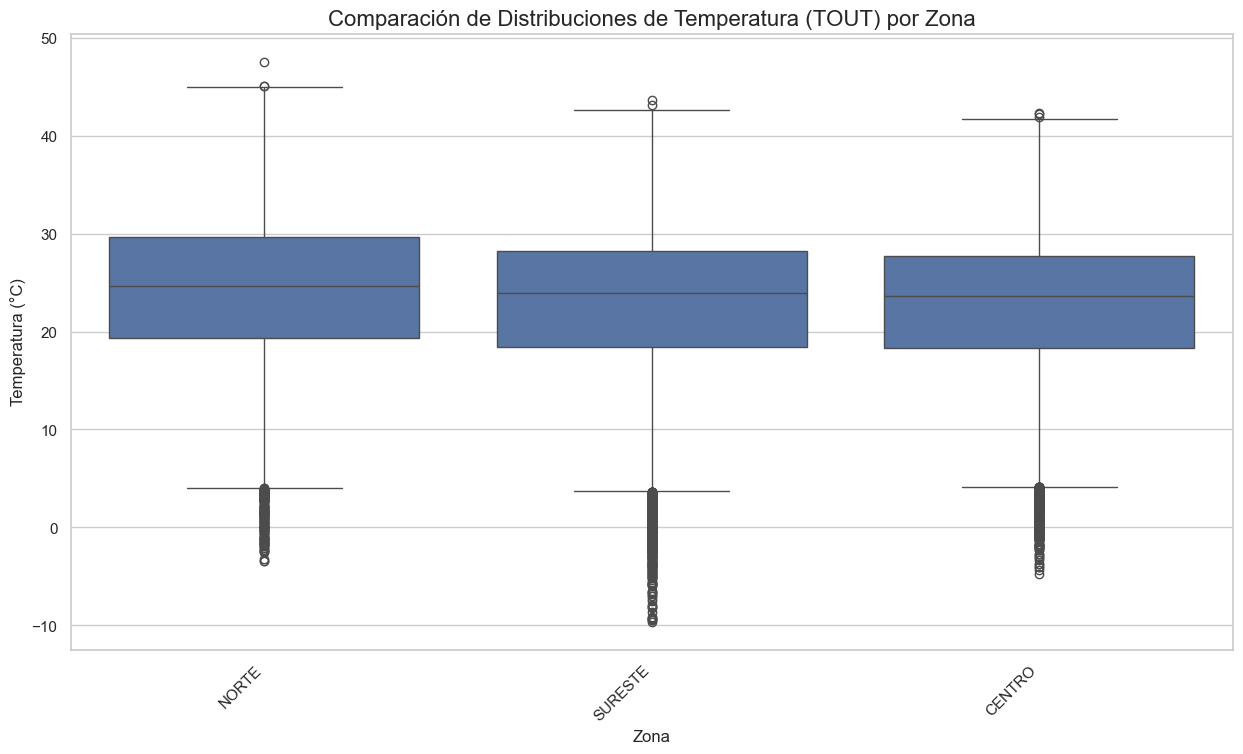

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

print("\n--- Generando Box Plots por Zona ---")

# 1. Box Plot de PM10 por Zona
plt.figure(figsize=(15, 8))
sns.boxplot(x='Zona', y='PM10', data=df)
plt.title('Comparación de Distribuciones de PM10 por Zona', fontsize=16)
plt.ylabel('PM10 (µg/m3)')
plt.xlabel('Zona')
plt.xticks(rotation=45, ha='right')
plt.show()

# 2. Box Plot de Ozono (O3) por Zona
plt.figure(figsize=(15, 8))
sns.boxplot(x='Zona', y='O3', data=df)
plt.title('Comparación de Distribuciones de CO por Zona', fontsize=16)
plt.ylabel('CO')
plt.xlabel('Zona')
plt.xticks(rotation=45, ha='right')
plt.show()

# 3. Box Plot de Temperatura (TOUT) por Zona
plt.figure(figsize=(15, 8))
sns.boxplot(x='Zona', y='TOUT', data=df)
plt.title('Comparación de Distribuciones de Temperatura (TOUT) por Zona', fontsize=16)
plt.ylabel('Temperatura (°C)')
plt.xlabel('Zona')
plt.xticks(rotation=45, ha='right')
plt.show()

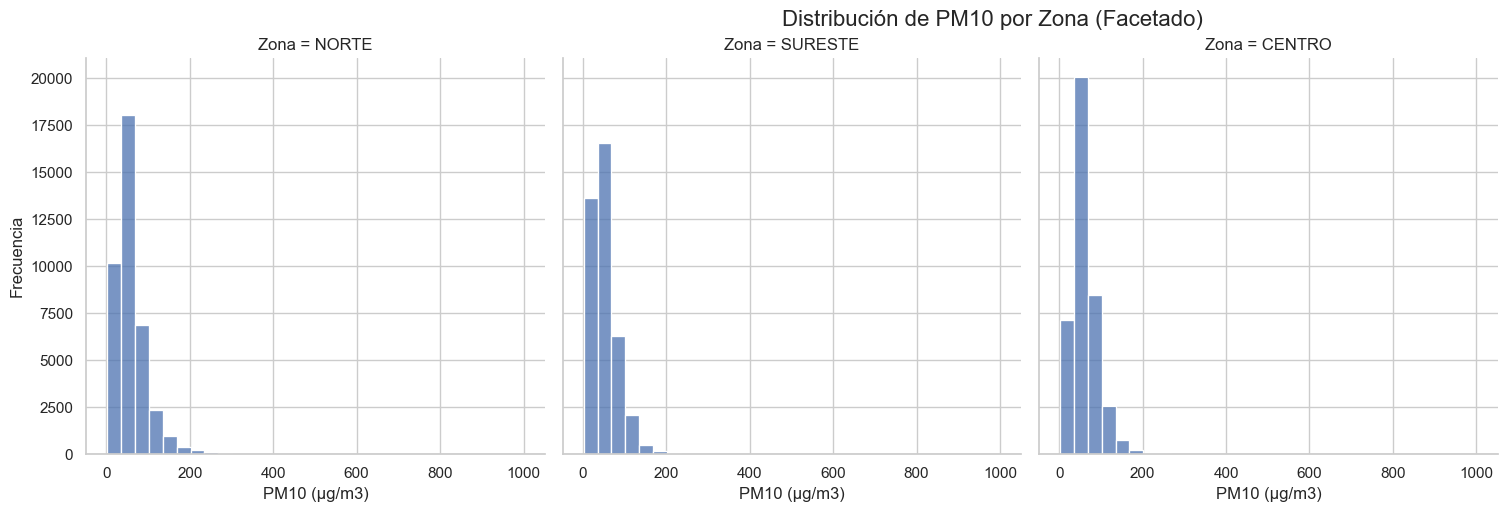

In [41]:
g = sns.displot(df, x='PM10', col='Zona', col_wrap=4, kde=False, bins=30)
g.fig.suptitle('Distribución de PM10 por Zona (Facetado)', y=1.02, fontsize=16)
g.set_axis_labels('PM10 (µg/m3)', 'Frecuencia')
plt.show()

Datos filtrados. 2232 registros encontrados para Mayo 2025.


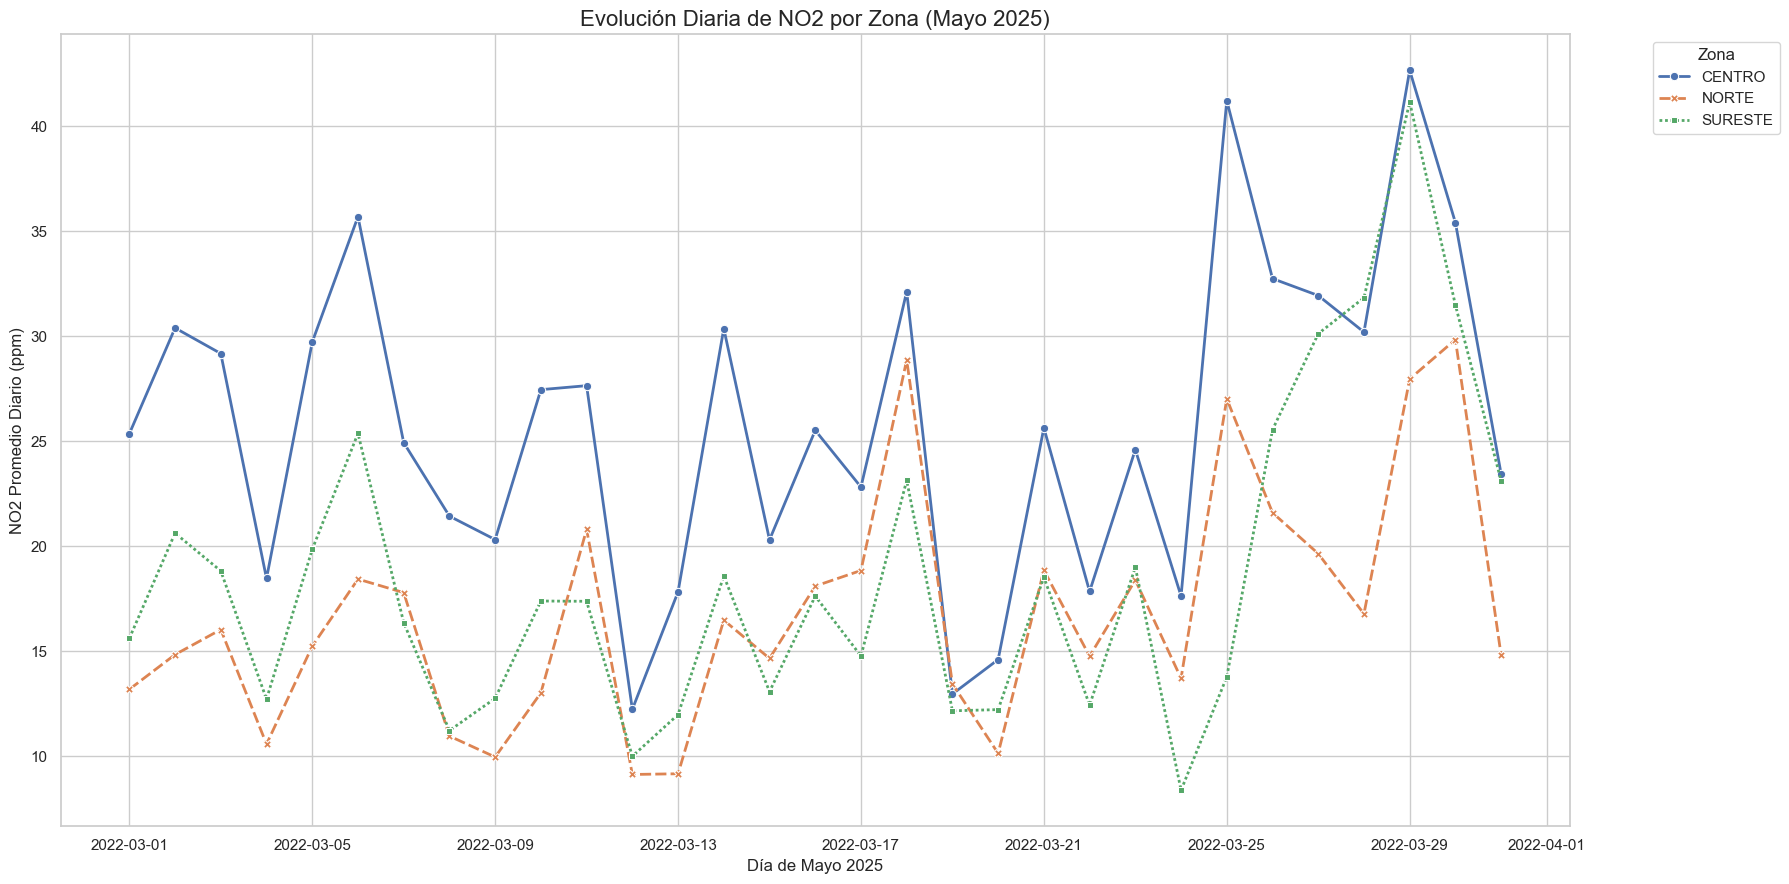

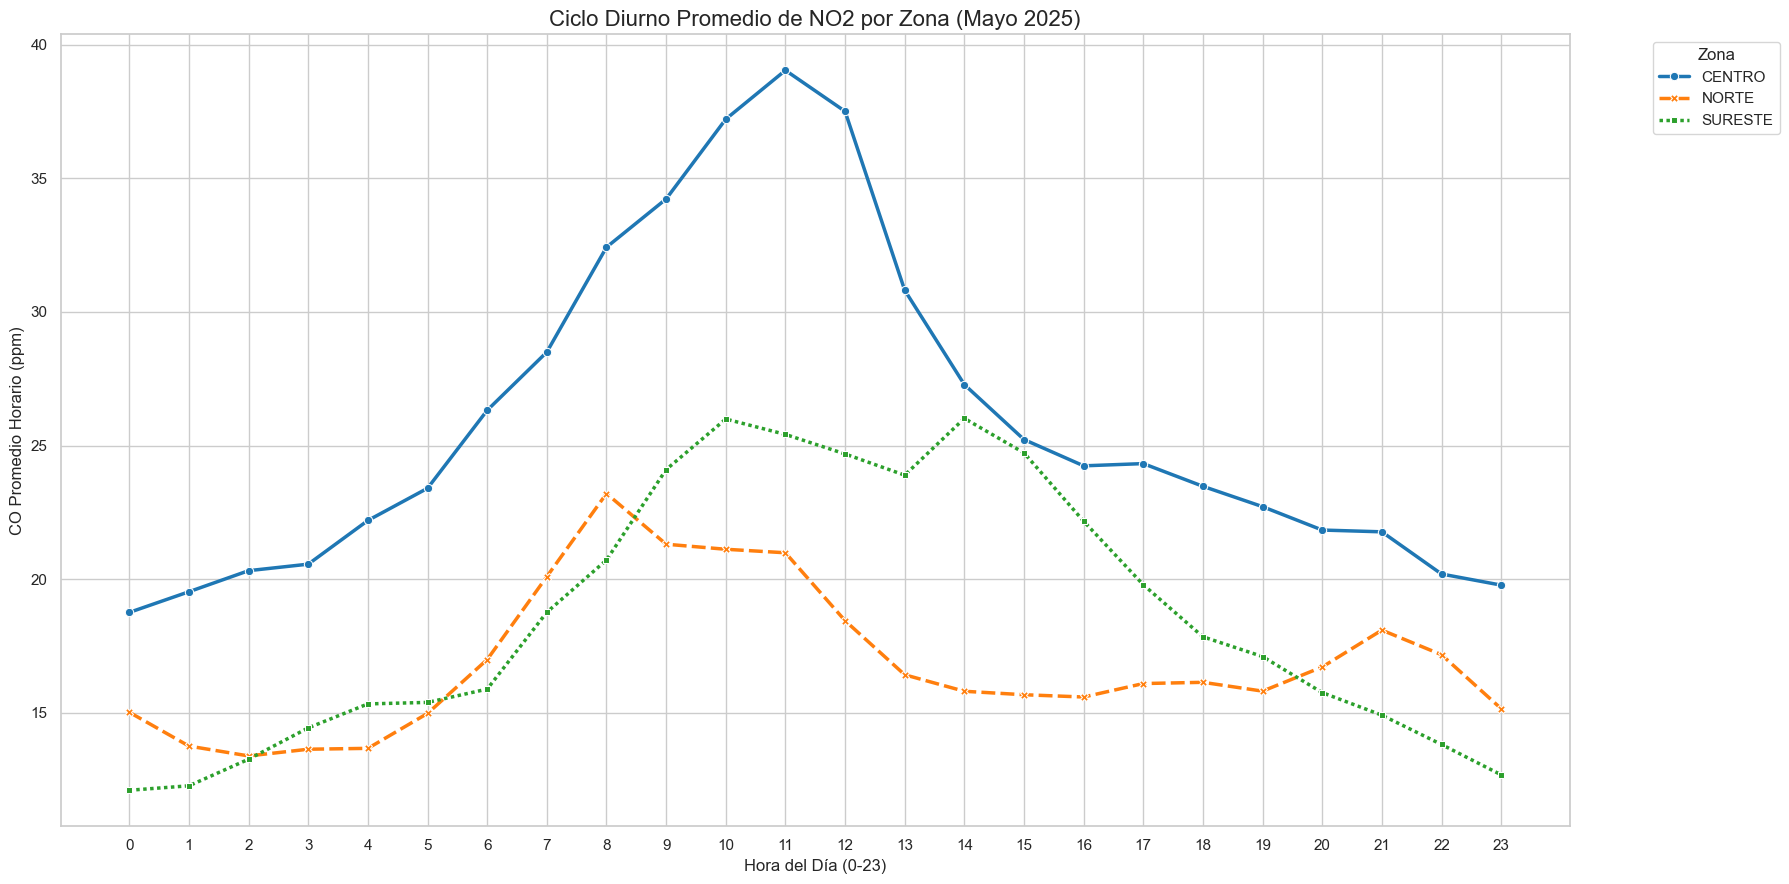

In [54]:
#ordnar df
df.sort_index(inplace=True)

#Filtrar el DataFrame para el rango de fechas (Mayo 2025)
df_mayo_2025 = df.loc['2022-03-01':'2022-03-31'].copy()

if df_mayo_2025.empty:
    print("Advertencia: No se encontraron datos para Mayo de 2025.")
else:
    print(f"Datos filtrados. {df_mayo_2025.shape[0]} registros encontrados para Mayo 2025.")


if not df_mayo_2025.empty:
    plt.figure(figsize=(18, 9))
    
    daily_co = df_mayo_2025.groupby('Zona')['PM2.5'].resample('D').mean().reset_index()

    sns.lineplot(
        data=daily_co, 
        x='date', 
        y='PM2.5', 
        hue='Zona',
        style='Zona',
        markers=True,
        linewidth=2
    )
    
    plt.title('Evolución Diaria de NO2 por Zona (Mayo 2025)', fontsize=16)
    plt.xlabel('Día de Mayo 2025')
    plt.ylabel('NO2 Promedio Diario (ppm)')
    plt.legend(title='Zona', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, which='both')
    plt.tight_layout()
    plt.show()

else:
    print("No se puede graficar (Diario): No hay datos para Mayo de 2025.")

#PATRÓN DE CICLO DIURNO (Promedio Horario)
if not df_mayo_2025.empty:
    plt.figure(figsize=(18, 9))
    
    #columna 'Hora' para agrupar
    df_mayo_2025['Hora'] = df_mayo_2025.index.hour
    
    #Agrupar por Zona y Hora, luego calcular la media de CO
    diurnal_cycle = df_mayo_2025.groupby(['Zona', 'Hora'])['PM2.5'].mean().reset_index()

    sns.lineplot(
        data=diurnal_cycle,
        x='Hora',
        y='PM2.5',
        hue='Zona',
        style='Zona',
        markers=True,
        linewidth=2.5,
        palette='tab10'
    )
    
    plt.title('Ciclo Diurno Promedio de NO2 por Zona (Mayo 2025)', fontsize=16)
    plt.xlabel('Hora del Día (0-23)')
    plt.ylabel('CO Promedio Horario (ppm)')
    plt.legend(title='Zona', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(range(0, 24))
    plt.grid(True, which='both')
    plt.tight_layout()
    plt.show()

else:
    print("No se puede graficar (Ciclo Diurno): No hay datos.")

Calculando la matriz de correlación...
Generando el heatmap...

--- Hallazgos Clave de Correlación ---

Correlaciones más fuertes con O3:
O3      1.000000
TOUT    0.461726
SR      0.457318
WSR     0.449177
SO2     0.184280
Name: O3, dtype: float64

Correlaciones más fuertes con PM2.5:
PM2.5    1.000000
PM10     0.510469
NO2      0.386864
NOX      0.360336
NO       0.277599
Name: PM2.5, dtype: float64

Correlaciones (Negativas) más fuertes con PM2.5 (Dispersión):
PRS     -0.210438
WSR     -0.165191
TOUT    -0.039583
RAINF   -0.035291
O3      -0.029470
Name: PM2.5, dtype: float64


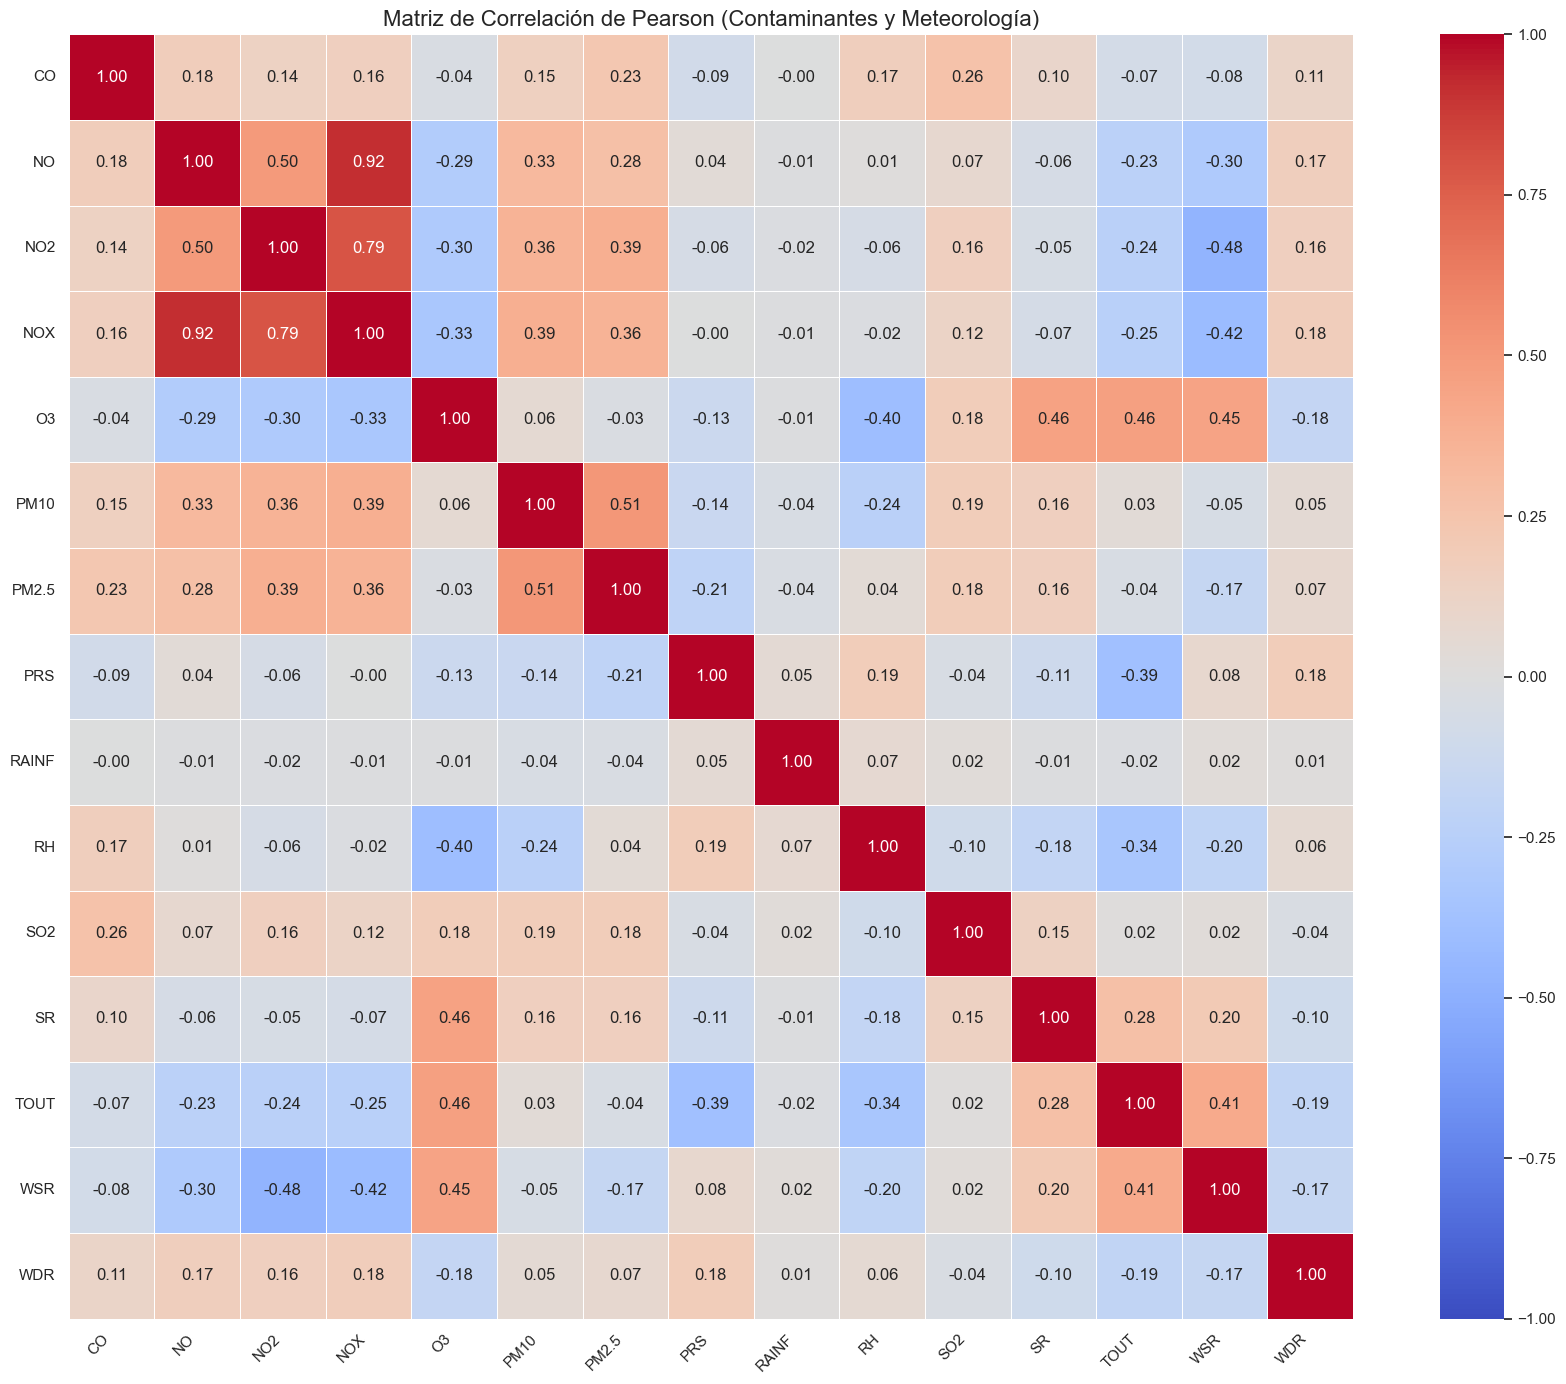

In [43]:
numeric_cols = df.select_dtypes(include=['float64']).columns

print("Calculando la matriz de correlación...")
corr_matrix = df[numeric_cols].corr(method='pearson')

print("Generando el heatmap...")
plt.figure(figsize=(18, 14)) # Tamaño amplio para 15x15 variables

sns.heatmap(
    corr_matrix, 
    annot=True,       # Mostrar los coeficientes
    fmt=".2f",        # Formato de 2 decimales
    cmap='coolwarm',  # Colormap divergente (azul-blanco-rojo)
    vmin=-1,          # Rango mínimo del color
    vmax=1,           # Rango máximo del color
    square=True,      # Forzar celdas cuadradas
    linewidths=.5     # Líneas ligeras entre celdas
)

plt.title('Matriz de Correlación de Pearson (Contaminantes y Meteorología)', fontsize=16)
plt.xticks(rotation=45, ha='right') # Rotar etiquetas X para legibilidad
plt.yticks(rotation=0) # Mantener etiquetas Y horizontales
plt.tight_layout() # Ajustar para que no se corten las etiquetas


print("\n--- Hallazgos Clave de Correlación ---")
print("\nCorrelaciones más fuertes con O3:")
print(corr_matrix['O3'].sort_values(ascending=False).head(5))

print("\nCorrelaciones más fuertes con PM2.5:")
print(corr_matrix['PM2.5'].sort_values(ascending=False).head(5))

print("\nCorrelaciones (Negativas) más fuertes con PM2.5 (Dispersión):")
print(corr_matrix['PM2.5'].sort_values(ascending=True).head(5))

In [44]:
output_dir = "data/processed"

print(f"Guardando archivos en {output_dir}...")
df.to_csv(f"{output_dir}/data_final_v1.csv", index=False)

Guardando archivos en data/processed...
